# Simple EDA Template

### Overview Steps:
    1. Research and Brainstorm
    2. Preprocessing
    3. Individual Variables Exploration
    4. Variable Correlation Exploration
    5. Conclusion and Next Steps

## 1. Research and Brainstorm

### Research the context of the data
    - how was the data collected?
    - who collected the data?
    - are there any biases that could have come from the data?
    - is there any domain knowledge needed in order to informly explore this data?
    - are there any variables that require research to understand their full meaning?
### Brainstorm questions and concepts that may or may not be answered with the data
    - are there any variables you suspect would correlate?
    - are there any variables that are expected to have certain trends or values?

## 2. Preprocessing

### Important issues to look for in the data

#### Duplicates
    - does the data have duplicates that need to be removed?
    - how does keeping or removing duplicate values change the insight from later EDA?
#### Null Values 
    - does the data have null values that should be removed?
    - how does keeping or removing null values change the insight from later EDA?
#### Oulier Values
    - do categorical varibles have resonable responses - example variables states have only real states?
    - do quantitative variables have a resonable range and standard deviation?
#### Inconsistent formats
    - do the variables have data types that make sense for the variable?

In [85]:
#load in packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [86]:
#https://www.kaggle.com/jealousleopard/goodreadsbooks

#https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
#load in data
data = pd.read_csv("bestsellers_with_categories.csv", error_bad_lines=False)

#have a large dataset?
# ! pip install datatble
# import datatable as dt
# data = dt.fread("").to_pandas()

In [87]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [88]:
#number of duplicates 
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

#if you would like to remove duplicated values
# data = data.drop_duplicates()
# print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [89]:
#number of na values by variable
nulls = data.isnull().sum().sort_values(ascending=False)
print("Number of missing values:")
nulls.head(20)

Number of missing values:


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [90]:
#observe unique values of variables to see if anything is sus
for variables in data.columns:
    print("----------------------------------------------")
    print("unique values of variable: " + str(variables))
    print(data[variables].unique())

----------------------------------------------
unique values of variable: Name
['10-Day Green Smoothie Cleanse' '11/22/63: A Novel'
 '12 Rules for Life: An Antidote to Chaos' '1984 (Signet Classics)'
 '5,000 Awesome Facts (About Everything!) (National Geographic Kids)'
 'A Dance with Dragons (A Song of Ice and Fire)'
 'A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons'
 'A Gentleman in Moscow: A Novel'
 'A Higher Loyalty: Truth, Lies, and Leadership'
 'A Man Called Ove: A Novel'
 "A Patriot's History of the United States: From Columbus's Great Discovery to the War on Terror"
 'A Stolen Life: A Memoir' 'A Wrinkle in Time (Time Quintet)'
 'Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment'
 'Adult Coloring Book Designs: Stress Relief Coloring Book: Garden Designs, Mandalas, Animals, and Paisley Patterns'
 'Adult Coloring Book: Stress Relieving Animal Designs'
 'Adult Coloring Book:

In [91]:
#statistical values of numerical variables
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [92]:
#find format of variables
print(data.dtypes)

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object


## 3. Individual Variables Exploration
    - is there a dominated value for certain variables?
    - is there an interesting distribution within the responses?
    - do the responses make sense based on the context and background of the data?

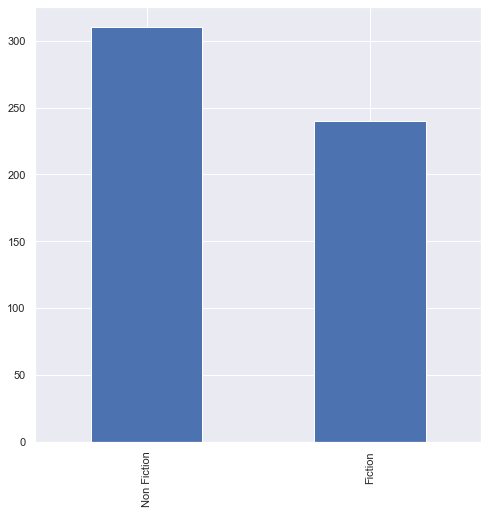

In [94]:
#value counts of categorical values
data['Genre'].value_counts().plot(kind='bar', figsize=(8,8))
pass

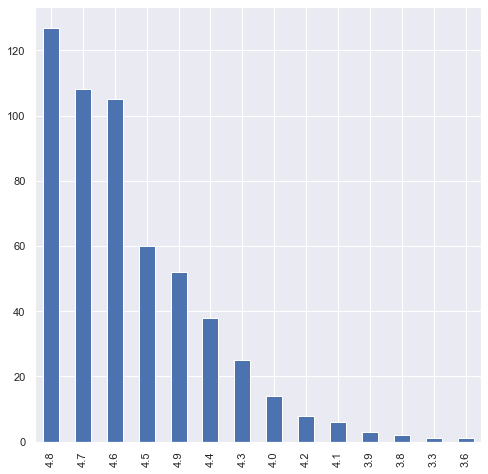

In [97]:
#value counts of categorical values
data['User Rating'].value_counts().plot(kind='bar', figsize=(8,8))
pass

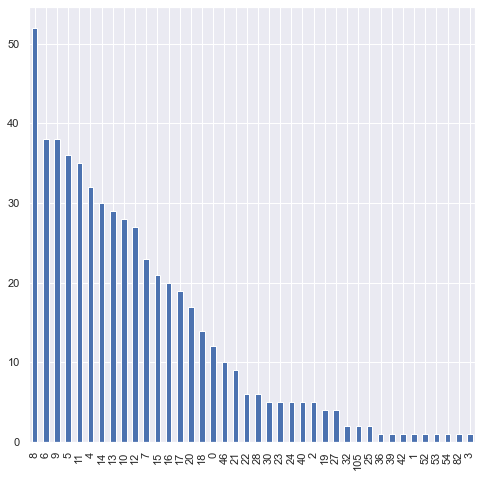

In [98]:
#value counts of categorical values
data['Price'].value_counts().plot(kind='bar', figsize=(8,8))
pass

In [122]:
author_counts = data.groupby('Author')['Name'].count()
author_counts.head(20)

Author
Abraham Verghese                       2
Adam Gasiewski                         1
Adam Mansbach                          1
Adir Levy                              1
Admiral William H. McRaven             1
Adult Coloring Book Designs            1
Alan Moore                             1
Alex Michaelides                       1
Alice Schertle                         1
Allie Brosh                            1
American Psychiatric Association       2
American Psychological Association    10
Amor Towles                            1
Amy Ramos                              2
Amy Shields                            1
Andy Weir                              1
Angie Grace                            1
Angie Thomas                           1
Ann Voskamp                            2
Ann Whitford Paul                      2
Name: Name, dtype: int64

In [ ]:
#if you have a continuous float value, might be useful to use a histogram
#I like to use the seaborn histogram 

# sns.displot(data, x = '', binwidth=0.2, kind = 'hist')

## 2-3. Alternative Method

### Pandas Profiling 


In [ ]:
# ! pip install pandas_profiling
import pandas_profiling

profile = data.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="pandas_profiling.html")

## 4. Variable Correlation Exploration
    - How to variables compare to one another
    - This is a good section to explore ideas and questions from the brainstorming questions of how certain variables might compare to one another
    - Often important to aggregate many of the features to compare

In [ ]:
#start with pairplot to get simple comparisions of variables
sns.pairplot(data)
pass

In [112]:
#Often important to aggregate many of the features to compare
author_average_price = data.groupby('Author')['Price'].mean()
author_average_price.head(20)

Author
Abraham Verghese                       11.0
Adam Gasiewski                          6.0
Adam Mansbach                           9.0
Adir Levy                              13.0
Admiral William H. McRaven             11.0
Adult Coloring Book Designs             4.0
Alan Moore                             42.0
Alex Michaelides                       14.0
Alice Schertle                          0.0
Allie Brosh                            17.0
American Psychiatric Association      105.0
American Psychological Association     46.0
Amor Towles                            15.0
Amy Ramos                               6.0
Amy Shields                            11.0
Andy Weir                               9.0
Angie Grace                            11.0
Angie Thomas                           11.0
Ann Voskamp                            13.0
Ann Whitford Paul                       4.0
Name: Price, dtype: float64

In [123]:
author_counts.head(20)

Author
Abraham Verghese                       2
Adam Gasiewski                         1
Adam Mansbach                          1
Adir Levy                              1
Admiral William H. McRaven             1
Adult Coloring Book Designs            1
Alan Moore                             1
Alex Michaelides                       1
Alice Schertle                         1
Allie Brosh                            1
American Psychiatric Association       2
American Psychological Association    10
Amor Towles                            1
Amy Ramos                              2
Amy Shields                            1
Andy Weir                              1
Angie Grace                            1
Angie Thomas                           1
Ann Voskamp                            2
Ann Whitford Paul                      2
Name: Name, dtype: int64

In [124]:
#how does number of books an author has on the top 50 compare to their average price?
Author_Price_Df = pd.DataFrame(data = author_average_price)
Author_Bookcount_Df = pd.DataFrame(data = author_counts)

Merged_Df = Author_Price_Df.join(Author_Bookcount_Df, on = 'Author', how = 'left')

In [125]:
Merged_Df.head()

,Price,Name
Author,,
Abraham Verghese,11.0,2
Adam Gasiewski,6.0,1
Adam Mansbach,9.0,1
Adir Levy,13.0,1
Admiral William H. McRaven,11.0,1


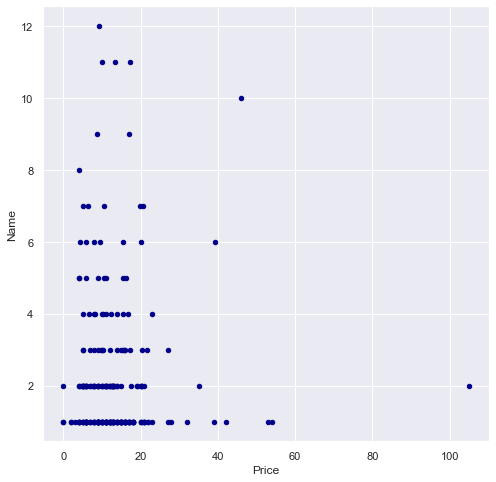

In [128]:
Merged_Df.plot.scatter(x='Price', y='Name', c='DarkBlue', figsize=(8,8))
pass

## 5. Conclusion and Next Steps
    - Document findings at the end of the EDA project that way they are easy to access and look at again in the future

### Notes from Amazon Top 50 Bestselling Books 2009-2019 EDA
    - 